In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
column_names = [
    'ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Speaker Job Title',
    'State Info', 'Party Affiliation', 'Barely True Counts', 'False Counts',
    'Half True Counts', 'Mostly True Counts', 'Pants on Fire Counts', 'Context'
]
#importing tsv files
train_data = pd.read_csv('train.tsv', sep='\t', header=None, names=column_names)
test_data = pd.read_csv('test.tsv', sep='\t', header=None, names=column_names)

In [3]:
train_data

,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [4]:
test_data.head()

,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


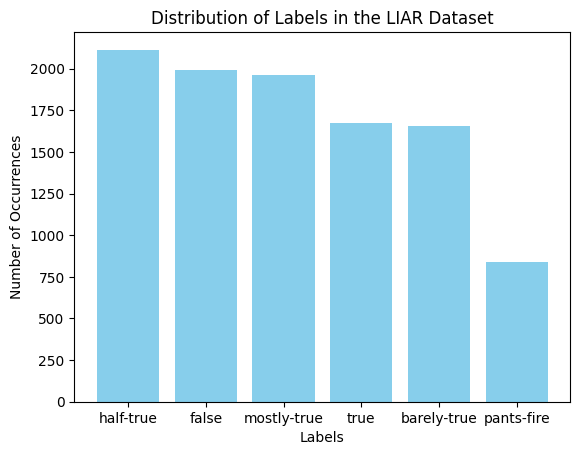

In [5]:
import matplotlib.pyplot as plt
# Count the occurrences of each label
label_counts = train_data['Label'].value_counts()
# Plot the bar graph using matplotlib
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Labels in the LIAR Dataset')
plt.show()

In [6]:
#MISALLIGNED TEXT
# Manually align text by removing extra whitespace and ensuring consistent formatting
train_data['Statement'] = train_data['Statement'].str.strip()  # Remove leading and trailing whitespace
train_data['Statement'] = train_data['Statement'].str.replace('\s+', ' ', regex=True)  # Replace multiple whitespaces with a single whitespace

test_data['Statement'] = test_data['Statement'].str.strip()  # Remove leading and trailing whitespace
test_data['Statement'] = test_data['Statement'].str.replace('\s+', ' ', regex=True)

print(train_data['Statement'])
print(test_data['Statement'])

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object
0       Building a wall on the U.S.-Mexico border will...
1       Wisconsin is on pace to double the number of l...
2       Says John McCain has done nothing to help the ...
3       Suzanne Bonamici supports a plan that will cut...
4       When asked by a reporter whether hes at the ce...
               

In [7]:
print(repr(test_data['Statement'].iloc[1263]))

'Ive been here almost every day.'


In [8]:
#calculate number of missing colums
# Get all features (column names) in the dataset
all_features = set(train_data.columns)
desired_features = set(["Statement", "Barely True Counts",
                         "False Counts", "Half True Counts",
                         "Mostly True Counts", "Pants on Fire Counts",
                         "Context", "Binary Label"])  # List of features with TargetFeature excluded

# Identify missing feature columns
missing_features = all_features.difference(desired_features)

# Filter rows with any missing value in any feature
missing_rows = train_data[train_data.isnull().any(axis=1)]

# Count the number of rows with missing features
num_missing_rows = missing_rows.shape[0]

print("Number of rows with missing value(s) in any feature:", num_missing_rows)

Number of rows with missing value(s) in any feature: 3519


In [9]:
#10240-3519=6721
import re #regular expression
# Remove GARBAGE VALUES or symbols
train_data['Statement'] = train_data['Statement'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
test_data['Statement'] = test_data['Statement'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Remove records with BLANK FIELDS
# Replace empty strings with NaN
train_data.replace('', np.nan, inplace=True)
test_data.replace('', np.nan, inplace=True)

# Drop rows with any NaN values across the entire dataset
train_data.dropna(how='any', inplace=True)
test_data.dropna(how='any', inplace=True)

print(train_data['Statement'])
print(test_data['Statement'])

0        Says the Annies List political group supports ...
1        When did the decline of coal start It started ...
2        Hillary Clinton agrees with John McCain by vot...
5        The Chicago Bears have had more starting quart...
7        Im the only person on this stage who has worke...
                               ...                        
10227    Recently though the media has reported on thou...
10228    Stopped by Smiley Cookie to pick up some great...
10230    The Supreme Courts views are radically out of ...
10231    When it comes to the state deficit Wisconsin i...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 6721, dtype: object
0       Building a wall on the USMexico border will ta...
1       Wisconsin is on pace to double the number of l...
2       Says John McCain has done nothing to help the ...
3       Suzanne Bonamici supports a plan that will cut...
6       Says that Tennessee law requires that schools ...
                

In [10]:
#CONVERT TO BINARY CLASSIFICATION
#pants-fire, false, barely-true as Fake and half-true,mostly-true, true as Real.
def map_label_to_binary(label):
    if label in ['true', 'mostly-true', 'half-true']:
        return 'Real'
    elif label in ['barely-true', 'false', 'pants-fire']:
        return 'Fake'

# Apply the mapping function to create a new binary label column
train_data['Binary Label'] = train_data['Label'].apply(map_label_to_binary)
test_data['Binary Label'] = test_data['Label'].apply(map_label_to_binary)

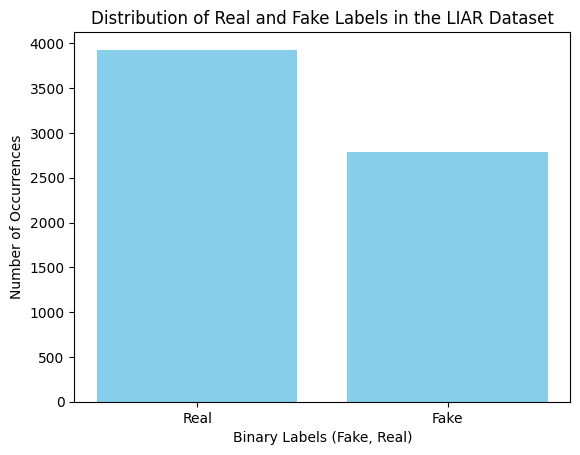

             Label Binary Label
0            false         Fake
1        half-true         Real
2      mostly-true         Real
5             true         Real
7        half-true         Real
...            ...          ...
10227   pants-fire         Fake
10228  barely-true         Fake
10230  barely-true         Fake
10231    half-true         Real
10239   pants-fire         Fake

[6721 rows x 2 columns]


In [11]:
binary_label_counts = train_data['Binary Label'].value_counts()
plt.bar(binary_label_counts.index, binary_label_counts.values, color='skyblue')
plt.xlabel('Binary Labels (Fake, Real)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Real and Fake Labels in the LIAR Dataset')
plt.show()

print(train_data[['Label','Binary Label']])

In [12]:
#Drop label column
train_data = train_data.drop(columns=['Label'])
test_data = test_data.drop(columns=['Label'])

In [13]:
# Aggregate counts into 'Real Counts' and 'Fake Counts'
# This line creates a new column 'Real Counts' by summing 'Half True Counts' and 'Mostly True Counts' for each row.
train_data['Real Counts'] = train_data[['Half True Counts', 'Mostly True Counts']].sum(axis=1)
test_data['Real Counts'] = test_data[['Half True Counts', 'Mostly True Counts']].sum(axis=1)

# This line creates a new column 'Fake Counts' by summing 'Barely True Counts', 'False Counts', and 'Pants on Fire Counts' for each row.
train_data['Fake Counts'] = train_data[['Barely True Counts', 'False Counts', 'Pants on Fire Counts']].sum(axis=1)
test_data['Fake Counts'] = test_data[['Barely True Counts', 'False Counts', 'Pants on Fire Counts']].sum(axis=1)

In [14]:
train_data.head()

,ID,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context,Binary Label,Real Counts,Fake Counts
0,2635.json,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,Fake,0.0,1.0
1,10540.json,When did the decline of coal start It started ...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,Real,2.0,0.0
2,324.json,Hillary Clinton agrees with John McCain by vot...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Real,323.0,150.0
5,12465.json,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,Real,7.0,4.0
7,153.json,Im the only person on this stage who has worke...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",Real,323.0,150.0


In [15]:
# Drop the original count columns as they are now aggregated into 'Real Counts' and 'Fake Counts'.
# This removes the original detailed count columns from the DataFrame.
train_data = train_data.drop(columns=['Barely True Counts', 'False Counts', 'Half True Counts', 'Mostly True Counts', 'Pants on Fire Counts'])
test_data = test_data.drop(columns=['Barely True Counts', 'False Counts', 'Half True Counts', 'Mostly True Counts', 'Pants on Fire Counts'])

In [16]:
train_data.head()

,ID,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Context,Binary Label,Real Counts,Fake Counts
0,2635.json,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer,Fake,0.0,1.0
1,10540.json,When did the decline of coal start It started ...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.,Real,2.0,0.0
2,324.json,Hillary Clinton agrees with John McCain by vot...,foreign-policy,barack-obama,President,Illinois,democrat,Denver,Real,323.0,150.0
5,12465.json,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,a an online opinion-piece,Real,7.0,4.0
7,153.json,Im the only person on this stage who has worke...,ethics,barack-obama,President,Illinois,democrat,"a Democratic debate in Philadelphia, Pa.",Real,323.0,150.0


In [17]:
test_data.head()

,ID,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Context,Binary Label,Real Counts,Fake Counts
0,11972.json,Building a wall on the USMexico border will ta...,immigration,rick-perry,Governor,Texas,republican,Radio interview,Real,65,78
1,11685.json,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,a news conference,Fake,0,3
2,11096.json,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,comments on ABC's This Week.,Fake,88,238
3,5209.json,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,a radio show,Real,4,3
6,7070.json,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,in a post on Facebook.,Real,0,0


In [18]:
#TOKANIZING AND STEMMING
import nltk #natural language tool kit
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) #set of english stop words
nltk.download('punkt') #punkt is a resource used for tokenizing text into sentences
ps = PorterStemmer() #Porter stemming is a process of reducing words to their base or root form (stem) by removing affixes.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
def preprocess_text(text):
    text = re.sub(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b|\b(?:[a-zA-Z0-9][-a-zA-Z0-9]{0,62}\.){1,126}(?:[a-zA-Z]{2,63})\b', '', text)
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) #Removes IP addresses and URLs
    tokens = [ps.stem(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words]
    return ' '.join(tokens)

In [21]:
# Apply preprocessing to the 'Statement' column
train_data['Statement'] = train_data['Statement'].apply(preprocess_text)
test_data['Statement'] = test_data['Statement'].apply(preprocess_text)
print(train_data['Statement'])
print(test_data['Statement'])

0        say anni list polit group support thirdtrimest...
1        declin coal start start natur ga took start be...
2        hillari clinton agre john mccain vote give geo...
5        chicago bear start quarterback last year total...
7        im person stage work activ last year pass alon...
                               ...                        
10227    recent though media report thousand illeg vote...
10228    stop smiley cooki pick great cooki famili alon...
10230    suprem court view radic step public opinion re...
10231    come state deficit wisconsin proport much trou...
10239    depart veteran affair manual tell veteran stuf...
Name: Statement, Length: 6721, dtype: object
0              build wall usmexico border take liter year
1                 wisconsin pace doubl number layoff year
2                      say john mccain done noth help vet
3       suzann bonamici support plan cut choic medicar...
6       say tennesse law requir school receiv half pro...
                

In [22]:
print(repr(test_data['Statement'].iloc[0]))
print(repr(test_data['Statement'].iloc[1]))
print(repr(test_data['Statement'].iloc[2]))

'build wall usmexico border take liter year'
'wisconsin pace doubl number layoff year'
'say john mccain done noth help vet'


In [23]:
#Label encoding for Binary label column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
train_data['Binary Label'] = le.fit_transform(train_data['Binary Label'])
test_data['Binary Label'] = le1.fit_transform(test_data['Binary Label'])

In [24]:
# Define which columns are text and which are numerical
text_features = ['Statement', 'Subject', 'Speaker', 'Speaker Job Title', 'State Info', 'Party Affiliation', 'Context']
numeric_features = ['Real Counts', 'Fake Counts']

X_train = train_data[text_features + numeric_features]
y_train = train_data['Binary Label'].values

X_test = test_data[text_features + numeric_features]
y_test = test_data['Binary Label'].values

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

class TextCombiner(BaseEstimator, TransformerMixin):
    def __init__(self, text_features):
        self.text_features = text_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.text_features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

#this pipeline has 2 steps, Text Combiner and TF-IDF vectorizer
#so combines and applies tf-idf on text data and scales numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('text', Pipeline([
            ('combine', TextCombiner(text_features)),
            ('vectorizer', TfidfVectorizer())
        ]), text_features),
        ('numeric', FunctionTransformer(), numeric_features)
    ],
    remainder='drop' # remaining columns that are not specified in the transformers list, if any drop
)

In [26]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)
X_train_dense = X_train_pre.toarray()  # Convert sparse matrix to dense array
X_test_dense = X_test_pre.toarray()    # Convert sparse matrix to dense array

In [27]:
import pickle
pickle.dump(preprocessor,open('preprocess.pkl','wb'))
pickled_model=pickle.load(open('preprocess.pkl','rb'))

In [28]:
corr_matrix = np.corrcoef(X_train_dense, rowvar=False)
print(corr_matrix)

[[ 1.00000000e+00 -1.11323416e-03 -2.46682662e-03 ... -1.11323416e-03
  -2.55543431e-02 -3.30198260e-02]
 [-1.11323416e-03  1.00000000e+00 -3.29748500e-04 ... -1.48809524e-04
   3.58540856e-03  3.95443381e-03]
 [-2.46682662e-03 -3.29748500e-04  1.00000000e+00 ... -3.29748500e-04
  -6.58343836e-03 -7.94821662e-03]
 ...
 [-1.11323416e-03 -1.48809524e-04 -3.29748500e-04 ...  1.00000000e+00
   5.89476249e-03  4.10186915e-02]
 [-2.55543431e-02  3.58540856e-03 -6.58343836e-03 ...  5.89476249e-03
   1.00000000e+00  7.40949903e-01]
 [-3.30198260e-02  3.95443381e-03 -7.94821662e-03 ...  4.10186915e-02
   7.40949903e-01  1.00000000e+00]]


In [29]:
# Convert correlation matrix to DataFrame for easier handling
corr_df = pd.DataFrame(corr_matrix)
# Select the upper triangle of the correlation matrix
upper = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))
# Find features with correlation greater than a specified threshold (e.g., 0.9)
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print(f"Features to drop: {to_drop}")

Features to drop: [24, 66, 100, 169, 210, 271, 335, 381, 406, 410, 455, 463, 516, 546, 662, 670, 678, 690, 694, 703, 719, 721, 733, 741, 769, 795, 804, 821, 855, 918, 943, 967, 970, 975, 989, 1007, 1011, 1045, 1046, 1047, 1070, 1081, 1087, 1091, 1095, 1107, 1115, 1125, 1137, 1143, 1153, 1176, 1187, 1203, 1211, 1222, 1233, 1251, 1263, 1273, 1291, 1300, 1302, 1306, 1312, 1313, 1327, 1332, 1334, 1336, 1338, 1362, 1394, 1413, 1418, 1422, 1426, 1432, 1444, 1476, 1486, 1521, 1540, 1545, 1561, 1580, 1589, 1602, 1603, 1617, 1658, 1665, 1688, 1693, 1729, 1734, 1751, 1757, 1761, 1769, 1772, 1803, 1812, 1849, 1851, 1860, 1866, 1876, 1880, 1885, 1912, 1918, 1919, 1928, 1946, 1954, 1980, 2009, 2014, 2020, 2031, 2042, 2059, 2069, 2079, 2105, 2124, 2141, 2154, 2155, 2182, 2197, 2200, 2207, 2208, 2214, 2231, 2246, 2270, 2285, 2291, 2312, 2325, 2330, 2335, 2349, 2353, 2354, 2382, 2389, 2392, 2398, 2406, 2417, 2428, 2452, 2457, 2458, 2463, 2472, 2478, 2498, 2509, 2518, 2530, 2532, 2536, 2541, 2557, 2564

In [30]:
import pickle
with open('to_drop.pkl', 'wb') as to_drop_file:
    pickle.dump(to_drop, to_drop_file)

In [31]:
# Convert to DataFrame for easier indexing (optional)
X_train_reduced = pd.DataFrame(X_train_dense)
# Drop columns from DataFrame
X_train_reduced = X_train_reduced.drop(columns=to_drop)
# Convert back to NumPy array if necessary
X_train_reduced = X_train_reduced.values
print(f"Reduced features set shape: {X_train_reduced.shape}")

#for test data
X_test_reduced = pd.DataFrame(X_test_dense)
# Drop columns from DataFrame
X_test_reduced = X_test_reduced.drop(columns=to_drop)
# Convert back to NumPy array if necessary
X_test_reduced = X_test_reduced.values
print(f"Reduced features set shape: {X_test_reduced.shape}")

Reduced features set shape: (6721, 7816)
Reduced features set shape: (853, 7816)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf=LogisticRegression(max_iter=1000)
rnd_clf=RandomForestClassifier()
tree_clf = DecisionTreeClassifier()

voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('dsc',tree_clf)],voting='hard')
voting_clf.fit(X_train_reduced,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dsc', DecisionTreeClassifier())])

In [33]:
import pickle
pickle.dump(voting_clf,open('mlmodel.pkl','wb'))
pickled_model=pickle.load(open('mlmodel.pkl','rb'))

In [34]:
y_pred=voting_clf.predict(X_test_reduced)
print(y_pred)

[1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print('Voting Classifier:')
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')

Voting Classifier:
Accuracy:  0.7034
Precision: 0.7068
Recall:    0.8512
F1 Score:  0.7723
